### Курсовая работа. Классическое машинное обучение
### Раздел 3.4. Классификация: превышает ли значение SI значение 8

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [89]:
# Загрузить данные
df = pd.read_csv('si.csv')
display(df.head())
print(df.shape)

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,SI
0,-1.812779,1.202897,0.868409,-0.729005,1.094277,0.225177,-1.586455,1.520873,-2.063487,-0.593331,...,-0.221947,-0.091287,-0.091287,-0.034381,-0.034381,-0.247797,-0.281035,2.629564,-0.07706,28.125
1,-2.159098,2.055029,0.960485,-0.517805,1.272861,0.256636,-1.789985,1.261644,-2.213061,-0.583101,...,-0.221947,-0.091287,-0.091287,-0.034381,-0.034381,-0.247797,-0.281035,2.629564,-0.07706,7.000
2,-2.567062,2.109433,0.966363,-1.461422,1.036377,0.710135,-1.147686,1.103015,-2.400029,-0.557746,...,-0.221947,-0.091287,-0.091287,-0.034381,-0.034381,-0.247797,-0.281035,2.629564,-0.07706,0.720
3,-1.795530,0.524481,0.795104,-0.674338,0.593127,0.865439,-1.397847,1.993992,-2.242976,-0.592739,...,-0.221947,-0.091287,-0.091287,-0.034381,-0.034381,-0.247797,-0.281035,-0.140636,-0.07706,1.300
4,-1.609664,0.568684,0.799880,0.645806,-0.025219,-0.181798,-1.397847,0.149177,-0.735268,-0.593425,...,-0.221947,-0.091287,-0.091287,-0.034381,-0.034381,-0.247797,-0.281035,-0.140636,-0.07706,2.000


(847, 146)


In [90]:
SEED = 42

# Задать пороговое значение целевой переменной
THRESHOLD = 8

In [91]:
# Разделить данные на признаки и целевую переменную
X = df.drop('SI', axis=1)
y = (df['SI'] > THRESHOLD).astype(int)

# Разделить данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (592, 145), (592,)
Train dataset size: (255, 145), (255,)


Условием настоящей задачи является определение, превысит ли значение целевой переменной ее медианное значение. В конечном итоге перед нами стоит задача классификации с двумя возможными метками класса - превысит или нет.

C:\Users\Ronikari\AppData\Local\Temp\ipykernel_2508\2116491072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SI', data=y_data, palette='hls')


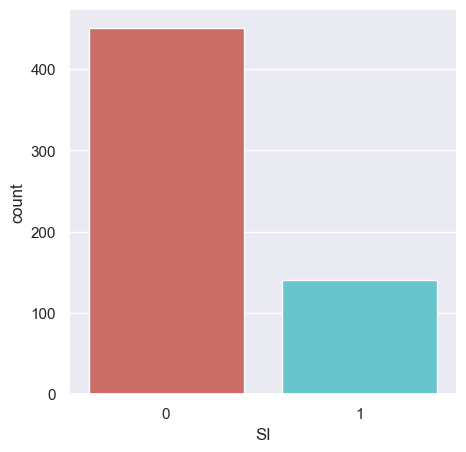

In [92]:
# Проанализировать распределение меток класса
sns.set(rc = {'figure.figsize':(5, 5)})
y_data = pd.DataFrame(y_train)
sns.countplot(x='SI', data=y_data, palette='hls')
plt.show()

Следует обратить внимание, что в этой задаче наблюдается существенный дисбаланс классов.

In [93]:
# Осуществить балансировку классов с помощью SMOTE
os = SMOTE(random_state=0, k_neighbors=2)
columns = X.columns
os_data_X, os_data_y = os.fit_resample(X, y)

os_data_X = pd.DataFrame(os_data_X, columns = columns)
os_data_y = pd.DataFrame(os_data_y, columns = ['SI'])

print(f'Features shape after SMOTE: {os_data_X.shape}')
print(f'Classes distribution after SMOTE:\n{os_data_y.value_counts()}')

# Повторно разделить данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=SEED)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Features shape after SMOTE: (1248, 145)
Classes distribution after SMOTE:
SI
0     624
1     624
Name: count, dtype: int64
Train dataset size: (873, 145), (873, 1)
Train dataset size: (375, 145), (375, 1)


C:\Users\Ronikari\AppData\Local\Temp\ipykernel_2508\2116491072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SI', data=y_data, palette='hls')


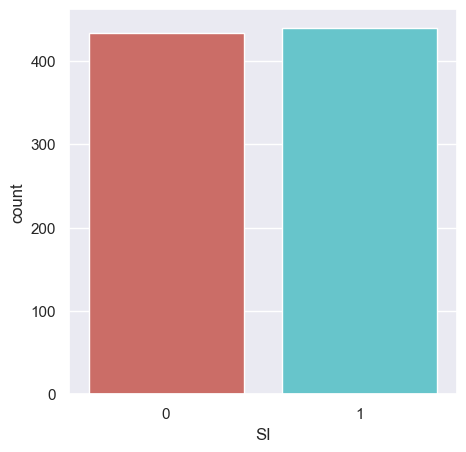

In [94]:
# Проанализировать распределение меток класса
sns.set(rc = {'figure.figsize':(5, 5)})
y_data = pd.DataFrame(y_train)
sns.countplot(x='SI', data=y_data, palette='hls')
plt.show()

В рамках настоящей задачи будем использовать следующие модели:
- `LogisticRegression`;
- `DecisionTree`;
- `kNN`;
- `RandomForest`;
- `SVC`;
- `XGBoost`;
- `CatBoost`.
  
Для анализа эффективности моделей проверим следующие метрики:
- Accuracy;
- Precision;
- F1;
- Recall.

In [95]:
# Инициализация моделей и метрик
models = {
    'LogisticRegression': LogisticRegression(random_state=SEED),
    'DecisionTree': DecisionTreeClassifier(random_state=SEED),
    'RandomForest': RandomForestClassifier(random_state=SEED),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=SEED),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=SEED),
    'CatBoost': CatBoostClassifier(random_state=SEED, verbose=False)
}
metrics = {
    'Accuracy': lambda y_true, y_pred: accuracy_score(y_true, y_pred),
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='binary'),
    'F1': lambda y_true, y_pred: f1_score(y_true, y_pred, average='binary'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='binary')
}

In [96]:
# Создать список для хранения результатов
results = []

In [97]:
for name, model in models.items():
    # Осуществить стратифицированную k-кратную перекрестную проверку
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=1)
    cv_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision', n_jobs=1)
    cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1', n_jobs=1)
    cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall', n_jobs=1)
    
    # Обучить модель на обучающей выборке и сделать прогноз на тестовой выборке
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    test_accuracy = metrics['Accuracy'](y_test, y_pred)
    test_precision = metrics['Precision'](y_test, y_pred)
    test_f1 = metrics['F1'](y_test, y_pred)
    test_recall = metrics['Recall'](y_test, y_pred)
    
    # Сохранить результаты
    results.append({
        'Model': name,
        'CV Accuracy': cv_accuracy.mean(),
        'CV Precision': cv_precision.mean(),
        'CV F1': cv_f1.mean(),
        'CV Recall': cv_recall.mean(),
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test F1': test_f1,
        'Test Recall': test_recall
    })

d:\mephi-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [98]:
# Записать результаты в DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by='Test F1', ascending=False, inplace=True)
display(results_df.round(4))

,Model,CV Accuracy,CV Precision,CV F1,CV Recall,Test Accuracy,Test Precision,Test F1,Test Recall
5,XGBoost,0.7789,0.7696,0.7851,0.8023,0.8213,0.8063,0.8213,0.8370
6,CatBoost,0.7744,0.7625,0.7805,0.8000,0.8133,0.7938,0.8148,0.8370
2,RandomForest,0.7835,0.7796,0.7857,0.7932,0.7920,0.7880,0.7880,0.7880
4,SVC,0.6930,0.6785,0.7071,0.7409,0.7600,0.7350,0.7656,0.7989
1,DecisionTree,0.7331,0.7247,0.7411,0.7591,0.7280,0.7113,0.7302,0.7500
3,KNN,0.6930,0.6557,0.7286,0.8205,0.6827,0.6419,0.7119,0.7989
0,LogisticRegression,0.6598,0.6515,0.6706,0.6932,0.6747,0.6505,0.6872,0.7283


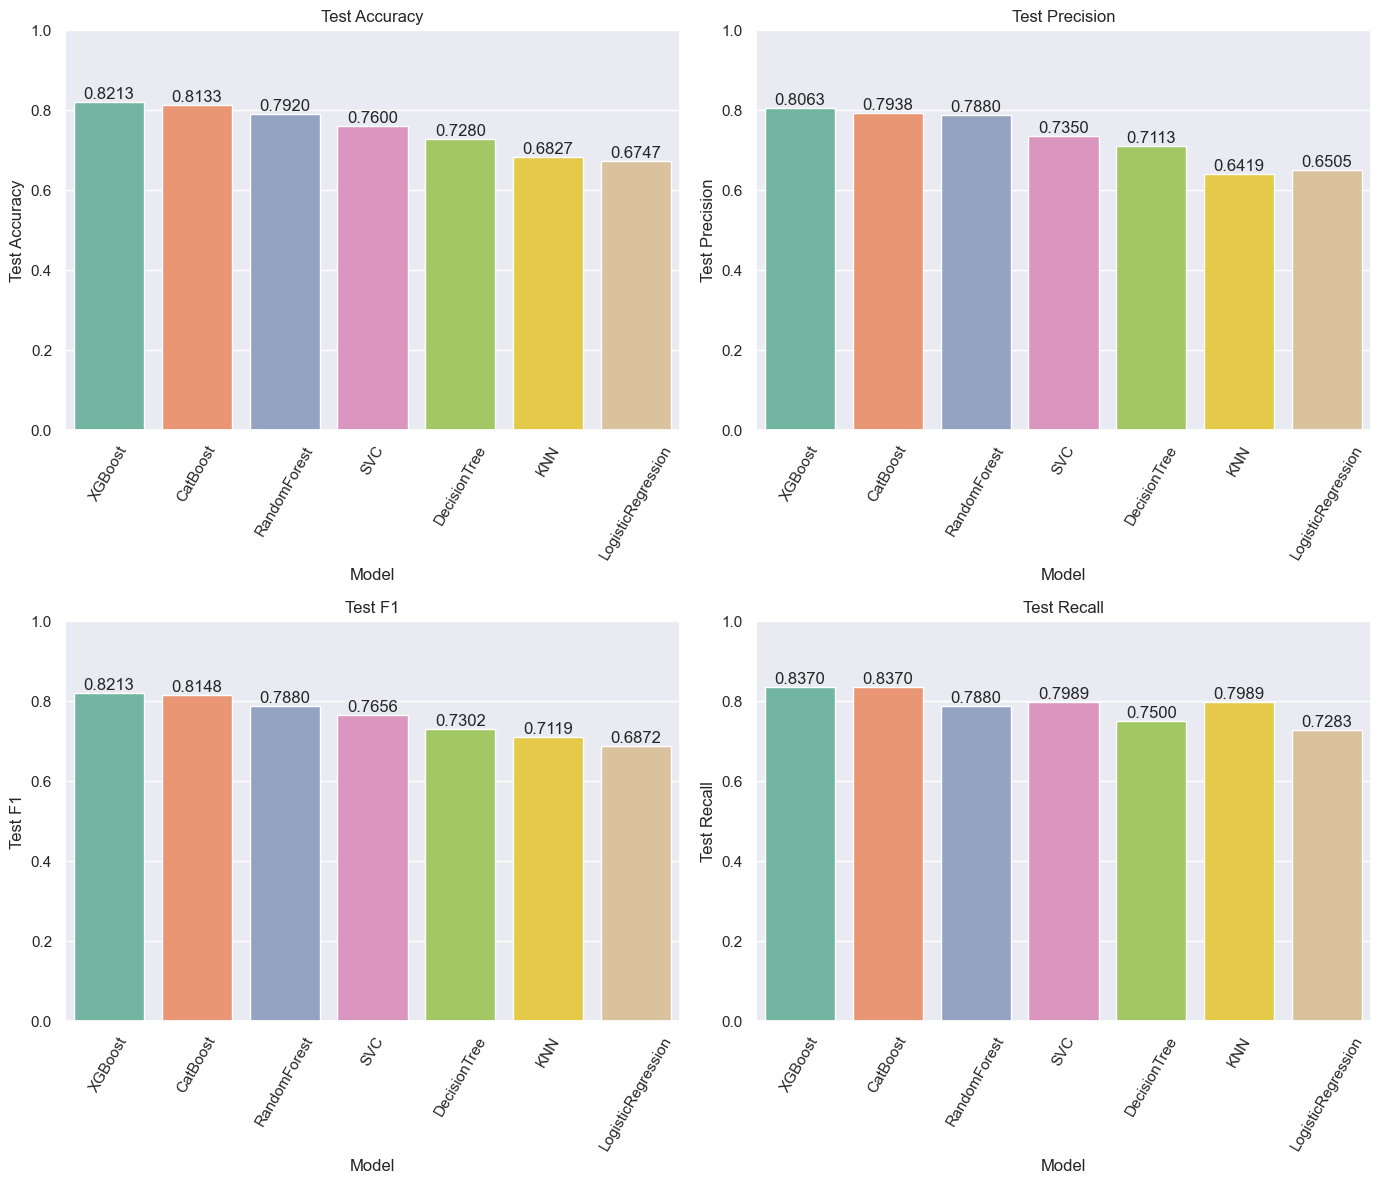

In [99]:
# Визуализация полученных метрик
plt.figure(figsize=(14, 12))
for i, metric in enumerate(list(metrics.keys())):
    plt.subplot(2, 2, i + 1)
    ax = sns.barplot(x='Model', y=f'Test {metric}', data=results_df, palette="Set2", hue='Model', legend=False)
    [ax.bar_label(ax.containers[x], fmt='%.4f', fontsize=12) for x in range(0, len(list(models.keys())))]
    plt.title(f'Test {metric}')
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

По совокупности полученных метрик наиболее эффективной моделью является `RandomForest`.   
Теперь используем `GridSearchCV` и подберем наиболее оптимальные гиперпараметры для всех моделей, после чего перепроверим метрики.

In [100]:
# Конфигурация гиперпараметров для GridSearchCV
params = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 250, 500, 1000]
    },
    'DecisionTree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'RandomForest': {
        'n_estimators': [100, 200, 300, 400, 500, 1000],
        'max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'SVC': {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300, 400, 500, 1000],
        'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
        'max_depth': [None, 5, 10, 20]
    },
    'CatBoost': {
        'n_estimators': [50, 100, 200, 400, 500, 1000]
    }
}

# Повторная инициализация моделей
models = {
    'LogisticRegression': LogisticRegression(random_state=SEED),
    'DecisionTree': DecisionTreeClassifier(random_state=SEED),
    'RandomForest': RandomForestClassifier(random_state=SEED),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=SEED),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=SEED),
    'CatBoost': CatBoostClassifier(random_state=SEED, verbose=False)
}

In [101]:
# Создать список для хранения результатов
results_grid = []

# Создать словарь для хранения предсказанных значений
pred_values = {}

In [102]:
for name, model in models.items():
    # Запустить поиск лучших гиперпараметров
    grid = GridSearchCV(model, param_grid=params[name], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # Лучшая модель
    best_model = grid.best_estimator_
    print(f'Лучшие параметры для {name}: {grid.best_params_}')
    
    # Осуществить стратифицированную k-кратную перекрестную проверку
    cv_accuracy = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=1)
    cv_precision = cross_val_score(best_model, X_train, y_train, cv=5, scoring='precision', n_jobs=1)
    cv_f1 = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1', n_jobs=1)
    cv_recall = cross_val_score(best_model, X_train, y_train, cv=5, scoring='recall', n_jobs=1)
    
    # Обучить и оценить качество лучшей модели на тестовой выборке
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    pred_values[name] = y_pred
    
    test_accuracy = metrics['Accuracy'](y_test, y_pred)
    test_precision = metrics['Precision'](y_test, y_pred)
    test_f1 = metrics['F1'](y_test, y_pred)
    test_recall = metrics['Recall'](y_test, y_pred)
    
    # Сохранить результаты
    results_grid.append({
        'Model': name,
        'CV Accuracy': cv_accuracy.mean(),
        'CV Precision': cv_precision.mean(),
        'CV F1': cv_f1.mean(),
        'CV Recall': cv_recall.mean(),
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test F1': test_f1,
        'Test Recall': test_recall
    })

d:\mephi-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Лучшие параметры для LogisticRegression: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


d:\mephi-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\mephi-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\utils\validati

Лучшие параметры для DecisionTree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


d:\mephi-ml\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Лучшие параметры для RandomForest: {'max_depth': None, 'n_estimators': 1000}


d:\mephi-ml\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  re

Лучшие параметры для KNN: {'metric': 'manhattan', 'n_neighbors': 5}


d:\mephi-ml\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ra

Лучшие параметры для SVC: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


d:\mephi-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mephi-ml\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

Лучшие параметры для XGBoost: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}
Лучшие параметры для CatBoost: {'n_estimators': 400}


In [103]:
# Записать результаты в DataFrame
results_grid_df = pd.DataFrame(results_grid)
results_grid_df.sort_values(by='Test F1', ascending=False, inplace=True)
display(results_grid_df.round(4))

,Model,CV Accuracy,CV Precision,CV F1,CV Recall,Test Accuracy,Test Precision,Test F1,Test Recall
6,CatBoost,0.7859,0.7741,0.7918,0.8114,0.8213,0.8000,0.8232,0.8478
5,XGBoost,0.7904,0.7810,0.7957,0.8114,0.8053,0.7846,0.8074,0.8315
2,RandomForest,0.7927,0.7834,0.7968,0.8114,0.8000,0.7946,0.7967,0.7989
4,SVC,0.7789,0.7386,0.7975,0.8682,0.7707,0.7311,0.7828,0.8424
1,DecisionTree,0.7400,0.7322,0.7467,0.7636,0.7280,0.7113,0.7302,0.7500
3,KNN,0.7068,0.6729,0.7354,0.8114,0.6933,0.6468,0.7255,0.8261
0,LogisticRegression,0.6827,0.6734,0.6945,0.7182,0.6800,0.6569,0.6907,0.7283


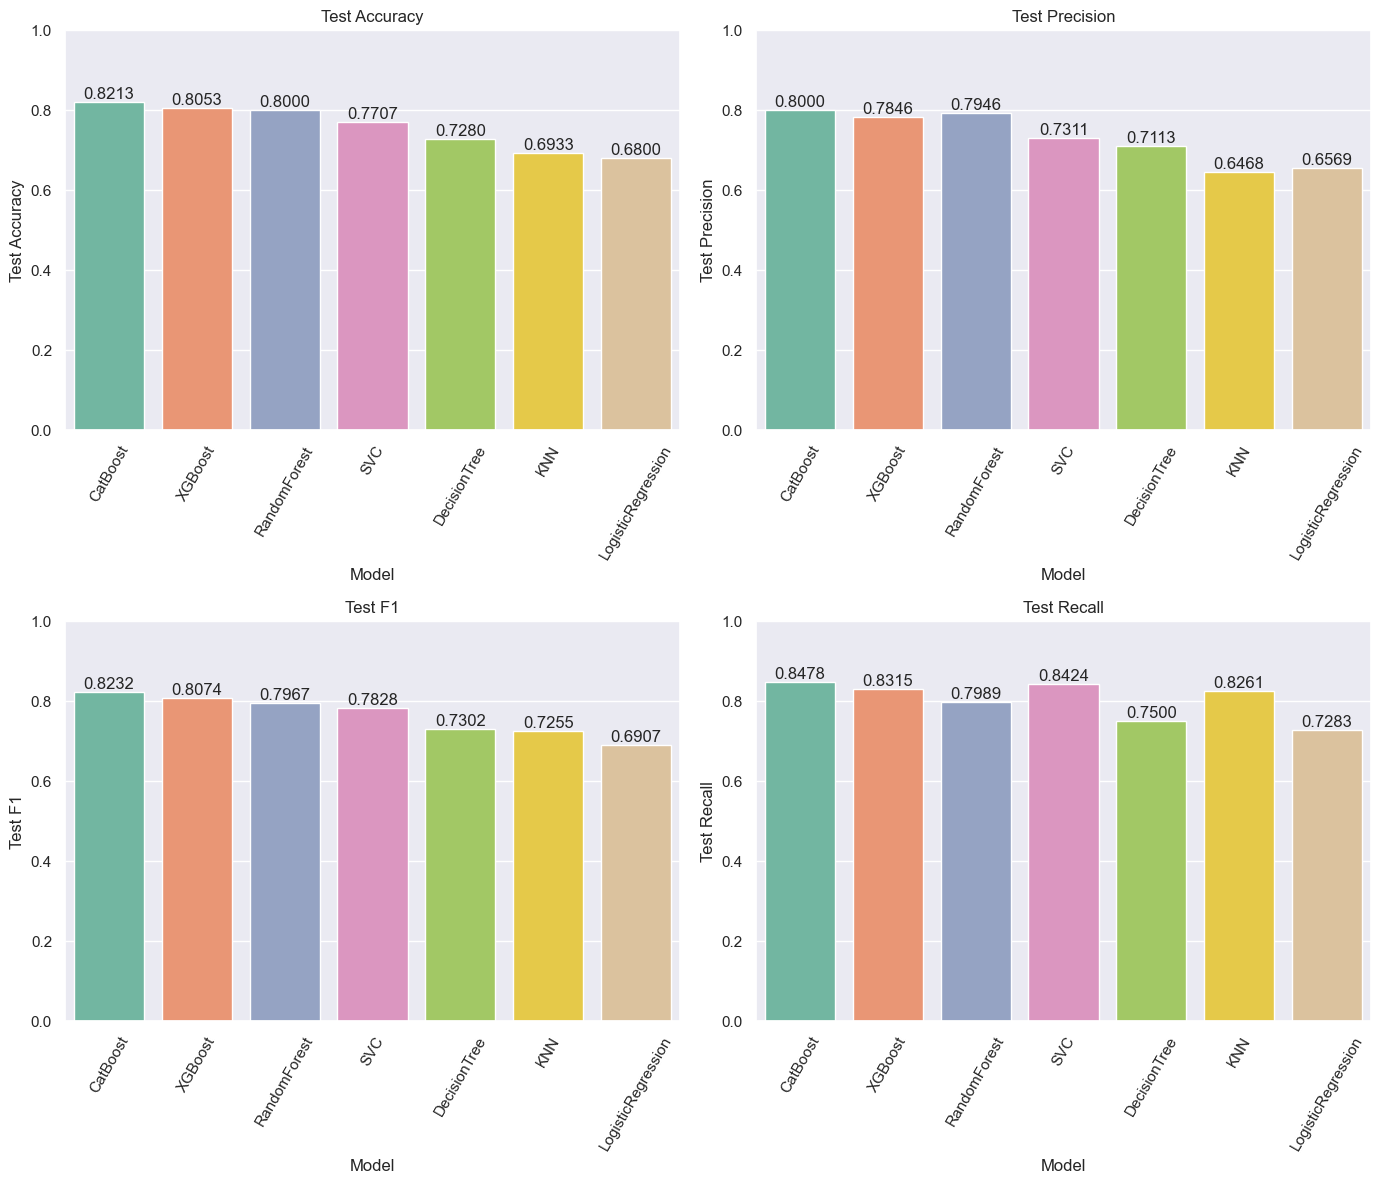

In [104]:
# Визуализация полученных метрик
plt.figure(figsize=(14, 12))
for i, metric in enumerate(list(metrics.keys())):
    plt.subplot(2, 2, i + 1)
    ax = sns.barplot(x='Model', y=f'Test {metric}', data=results_grid_df, palette="Set2", hue='Model', legend=False)
    [ax.bar_label(ax.containers[x], fmt='%.4f', fontsize=12) for x in range(0, len(list(models.keys())))]
    plt.title(f'Test {metric}')
    plt.ylim(0.0, 1.0)
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

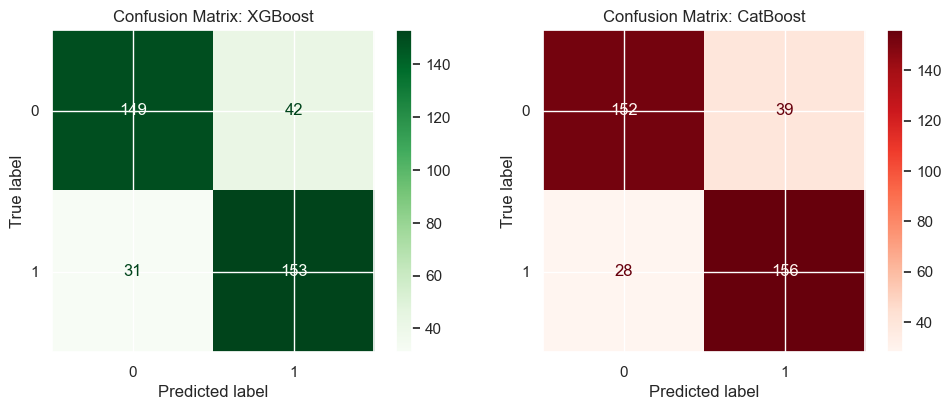

In [105]:
# Построить матрицы ошибок для лучших моделей
cm_xgb = confusion_matrix(y_test, pred_values['XGBoost'])
cm_cat = confusion_matrix(y_test, pred_values['CatBoost'])

fig, axes = plt.subplots(1, 2, figsize=(10,4), dpi=100)
cm_display = ConfusionMatrixDisplay(cm_xgb)
cm_display.plot(ax=axes[0], cmap='Greens')
cm_display = ConfusionMatrixDisplay(cm_cat)
cm_display.plot(ax=axes[1], cmap='Reds')

axes[0].set_title('Confusion Matrix: XGBoost')
axes[1].set_title('Confusion Matrix: CatBoost')

plt.tight_layout()
plt.show()

По совокупности полученных метрик и с подбором гиперпараметров посредством `GridSearchCV` наиболее эффективными моделями являются `CatBoost` и `XGBoost`.   

**Выводы**  
  
1. В рамках настоящей задачи были использованы следующие модели:
- `LogisticRegression`;
- `DecisionTree`;
- `kNN`;
- `RandomForest`;
- `SVC`;
- `XGBoost`;
- `CatBoost`.
  
   Наиболее оптимальными моделями по совокупности использованных метрик принимаются `CatBoost` и `XGBoost`.
2. Метрики всех моделей оказались хорошими. В качестве рекомендаций по дальнейшему улучшению предсказательной способности моделей требуется более глубокая обработка исходных данных. Как показал ранее выполненный EDA, в данных присутствует существенное число выбросов, однако для их эффективного устранения требуется знание специфики отрасли и понимание ключевой важности тех или иных признаков, что не было выполнено в настоящей работе.